In [2]:
import numpy as np
from os import listdir
from os.path import isfile, join
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

C:\Users\Jennifer Rogers\PycharmProjects\orcasounds\venv\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


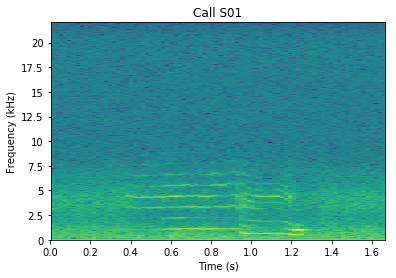

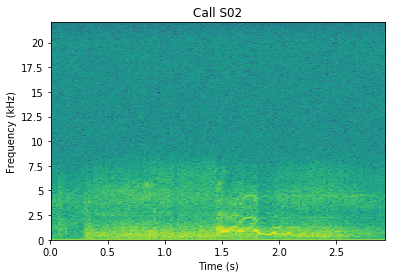

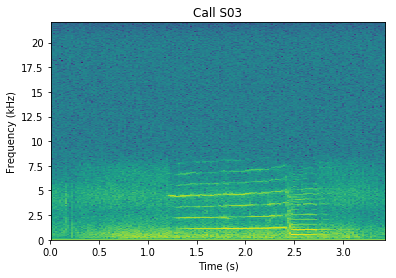

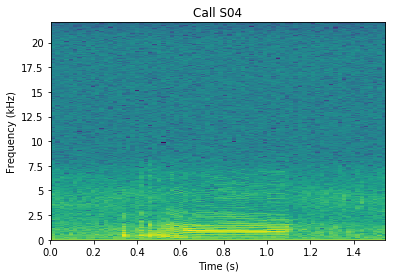

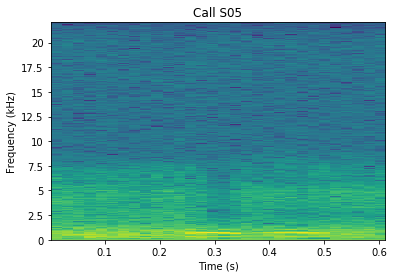

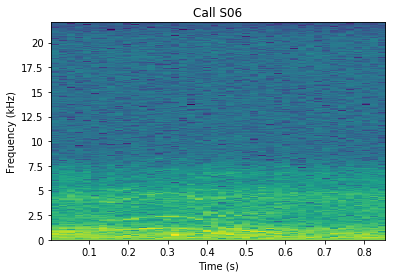

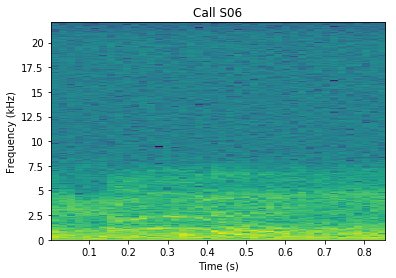

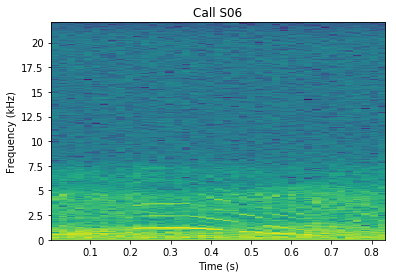

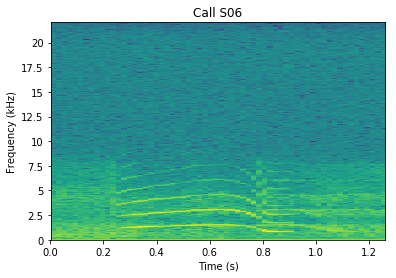

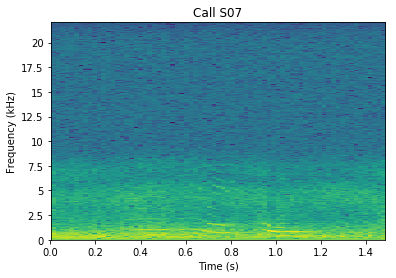

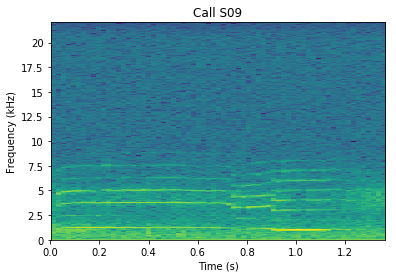

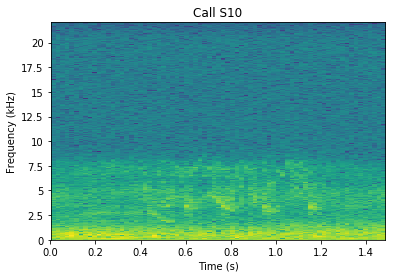

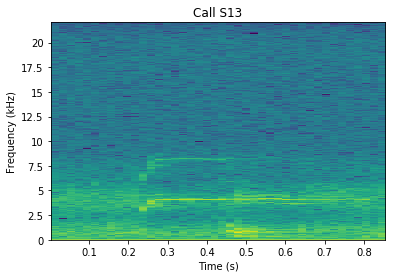

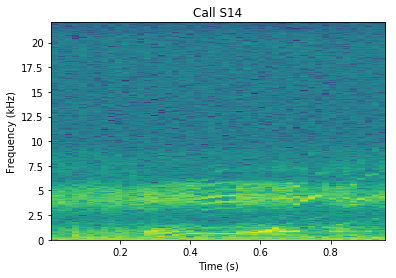

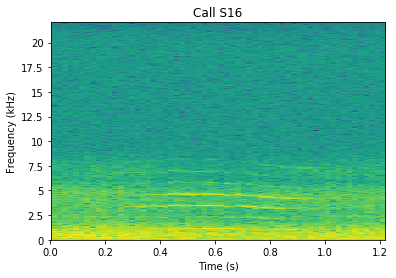

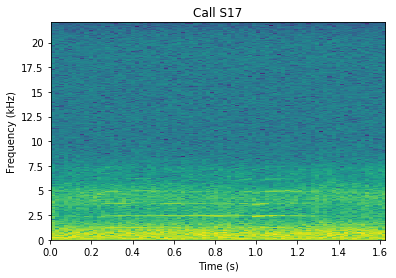

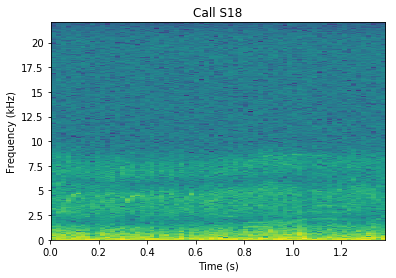

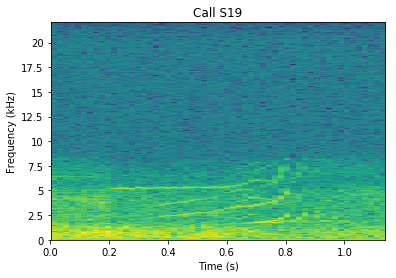

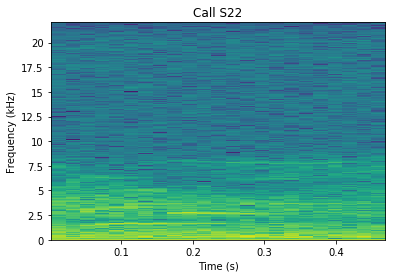

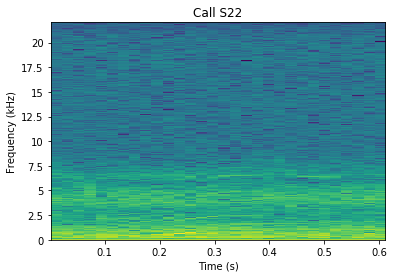

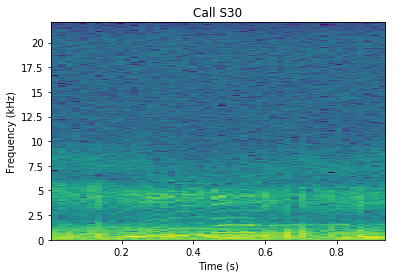

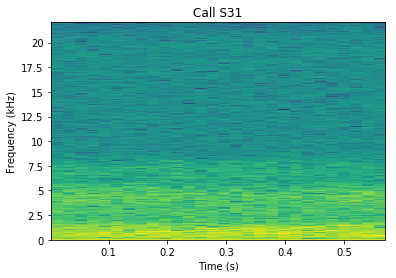

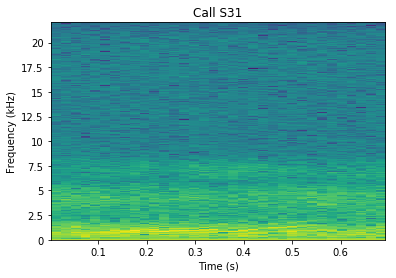

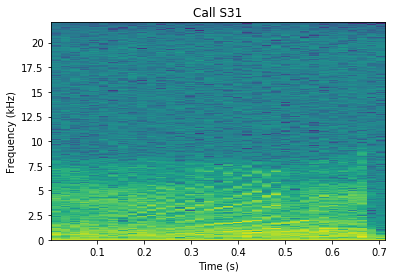

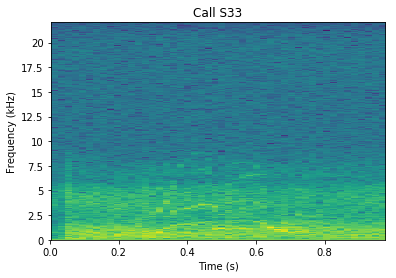

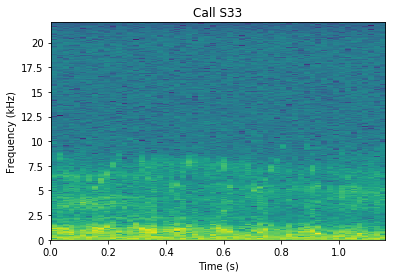

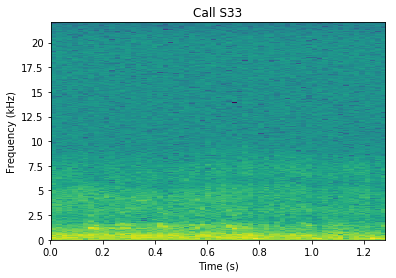

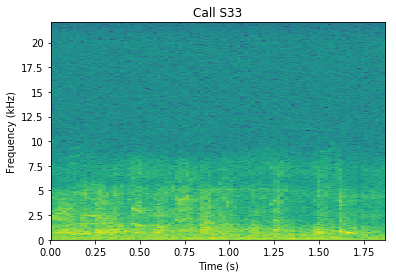

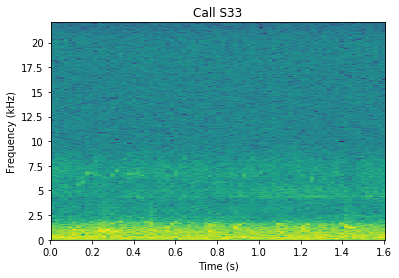

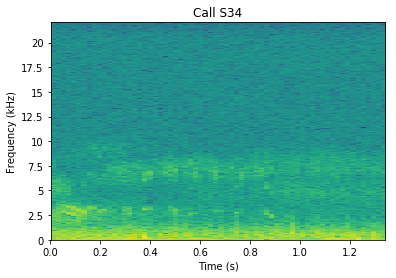

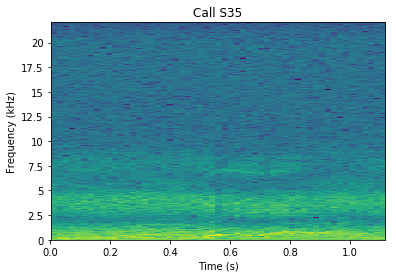

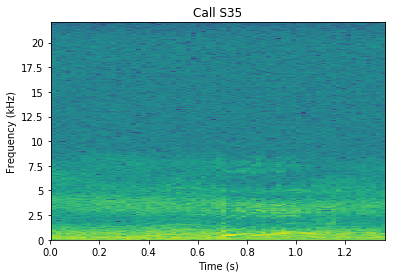

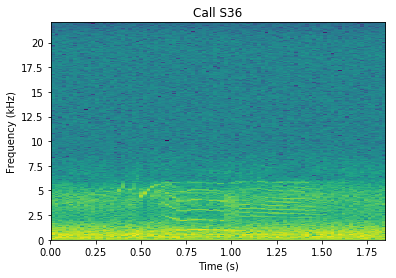

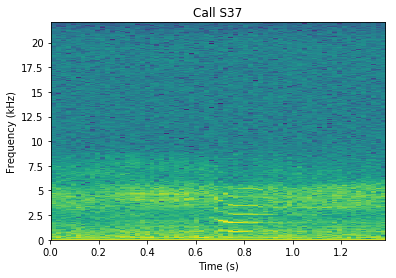

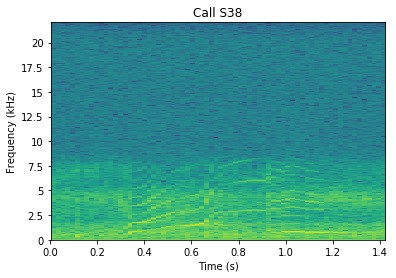

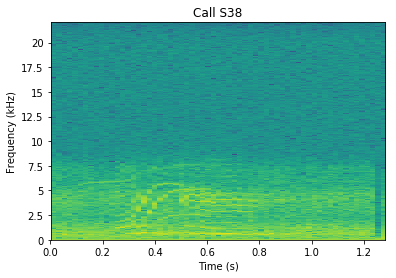

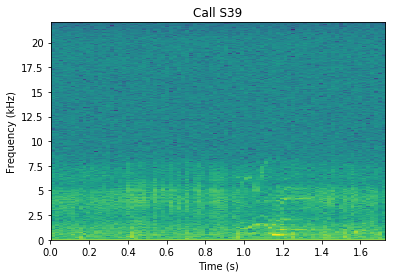

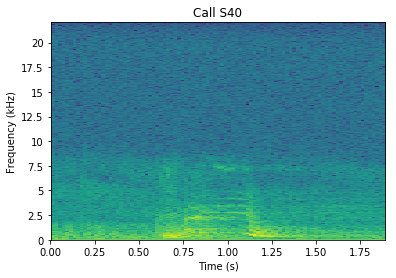

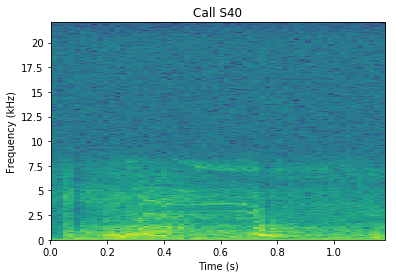

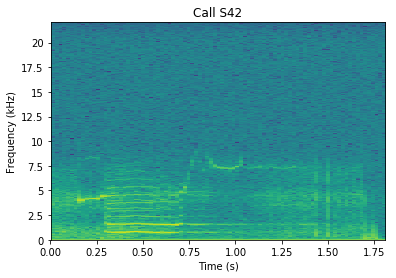

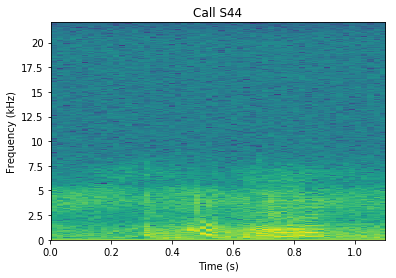

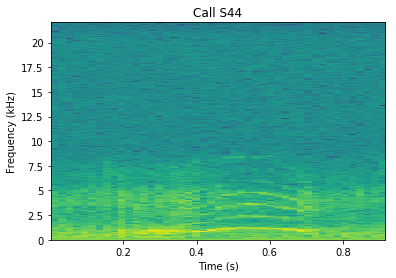

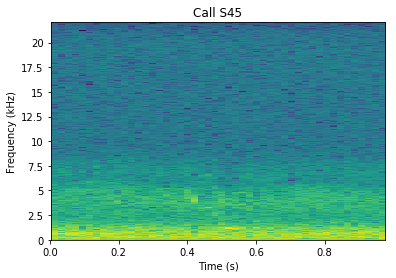

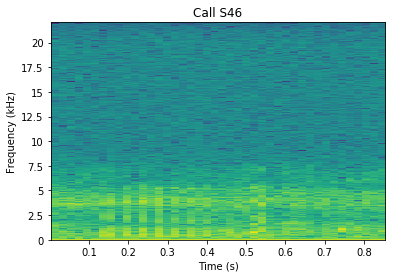

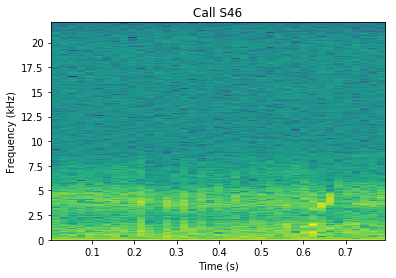

In [5]:
# Please replace this with YOUR path to orcadata
basePath = r"/Users/scott/Dropbox/Scottcoding/Orcasound/"
plotPath = join(basePath, "orcadata", "spectrogram", "Plots")
folderpath = join(basePath, "orcadata", "Sounds", "catalog", "flac")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx, file in enumerate(onlyfiles):
    data, samplerate = sf.read(join(folderpath, file))
    f, t, spec = signal.spectrogram(data, samplerate)
    filename = file.split(sep=".")[0]
    filenumber = filename.split(sep="-")[1]
    
    fig, ax = plt.subplots(1, 1)
    ax.specgram(data, Fs=samplerate, NFFT=1024)
    
    # Rescale y axis labels from Hz to KHz
    scale_y = 1000
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    ax.yaxis.set_major_formatter(ticks_y)

    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (kHz)")
    ax.set_title("Call " + filenumber)
    
    plt.savefig(join(plotPath, 
                 filename + ".png"))
